The goal of today's session is understanding how to use the interface of sklearn to create classifiers. And `mlxtend` is an additional library that would be handy in understanding how the model is behaving.

# Classification and Ensemble Methods

Whenever we have a finite set of discrete results, we call the problem a classification problem. We can start by basically doing what we did with regression and extending it to apply to scikit-learn's library classification algorithms.

In [39]:
# import the required libraries all at the beginning unlike the last time
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# when working with interactive notebooks, use the following
%matplotlib inline

# Data that is divided into several different classes
from sklearn.datasets import load_breast_cancer, load_iris

# disables FutureWarnings
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [3]:
print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
data = pd.DataFrame(load_breast_cancer().data, columns = load_breast_cancer().feature_names)
target = load_breast_cancer().target

In [5]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [6]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data = data[['mean texture'	,'mean perimeter','mean radius','mean area']]

In [8]:
data.head()

,mean texture,mean perimeter,mean radius,mean area
0,10.38,122.80,17.99,1001.0
1,17.77,132.90,20.57,1326.0
2,21.25,130.00,19.69,1203.0
3,20.38,77.58,11.42,386.1
4,14.34,135.10,20.29,1297.0


In [9]:
data['Diagnosis'] = pd.Series(target).map({0:'Benign',1:'Malignant'}) 

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


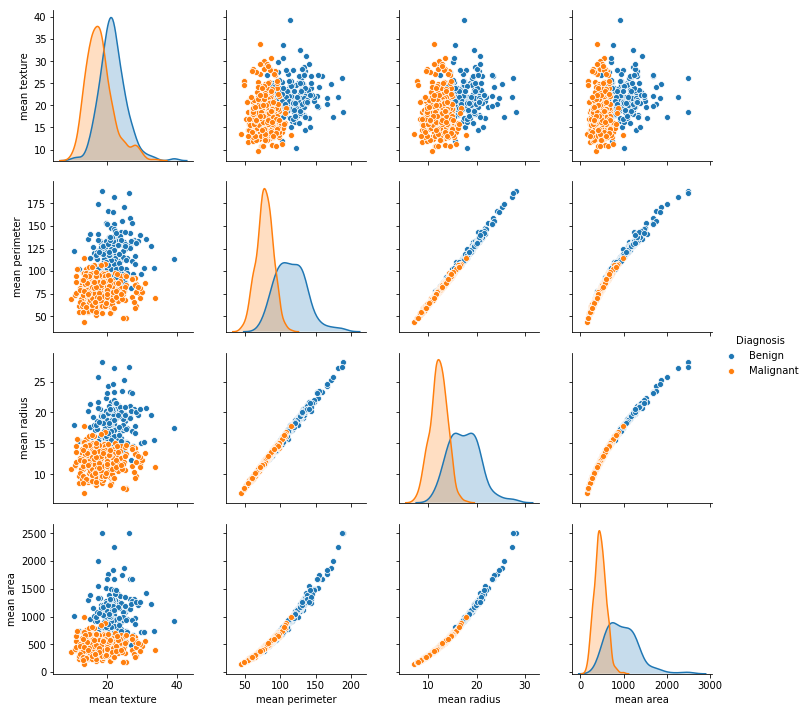

In [10]:
sns.pairplot(data, hue='Diagnosis', diag_kind = 'kde')

We will be plotting only the mean perimeter and the mean texture since this will make our representation easier. However, we can choose to work with the entire data set if we want to.

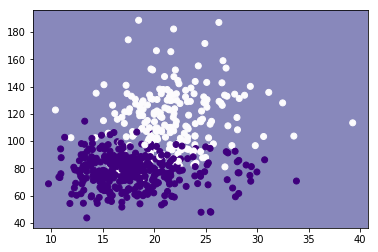

In [11]:
plt.axes().set_facecolor('#8888bb')
plt.scatter(data['mean texture'],data['mean perimeter'], c = target, cmap = 'Purples')

In [12]:
from sklearn.model_selection import train_test_split

Setting up the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Diagnosis','mean radius','mean area'],axis=1), target, test_size=.3, random_state = 42)

## Classification

### Logistic Regression
[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

The logistic regressor classifier converts the real-valued features into probabilities.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

In [15]:
#  penalty -> {'l1', 'l2', 'elasticnet', 'none'}
# solver -> {lbfgs, liblinear,newton-cg, saga, sag }

clf = LogisticRegression(penalty='l2', C = 0.2, solver = 'newton-cg')
# attempt with different penalties, regularization strength, and solvers
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("F1-score: ",f1_score(y_test, y_pred), 'Precision: ',precision_score(y_test, y_pred), 'Recall: ',recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

F1-score:  0.9363636363636363 Precision:  0.9196428571428571 Recall:  0.9537037037037037
[[ 54   9]
 [  5 103]]


In [15]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [16]:
from mlxtend.plotting import plot_decision_regions

Text(0, 0.5, 'mean perimeter')

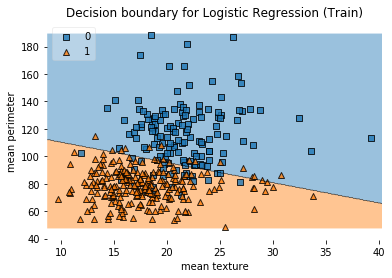

In [17]:
plot_decision_regions(X_train.values, y_train, clf=clf, legend=2)
plt.title("Decision boundary for Logistic Regression (Train)")
plt.xlabel("mean texture")
plt.ylabel("mean perimeter")

#### Gridsearch
Finding the best hyperparameters for your models


In [18]:
from sklearn.model_selection import GridSearchCV

In [20]:
clf = LogisticRegression(penalty='l2', max_iter = 100)
param_list = {'C':np.linspace(.001,100,100),'solver' : ['lbfgs','liblinear','newton-cg']}
grid = GridSearchCV(clf, param_list, scoring = 'accuracy', cv = 4)
grid.fit(X_train,y_train)
grid.best_params_

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 11.112, 'solver': 'liblinear'}

In [21]:
clf = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 6.061545454545455)
clf.fit(X_train,y_train)

LogisticRegression(C=6.061545454545455, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

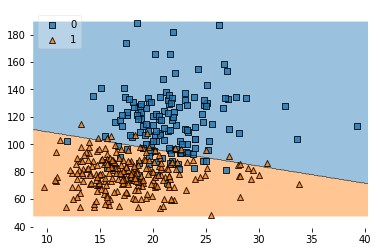

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train.values,y_train,clf,legend=2)

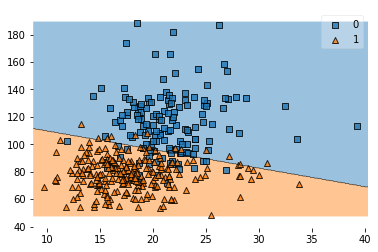

In [23]:
plot_decision_regions(X_train.values,y_train,grid)

### Decision Tree
[Documentation](https://scikit-learn.org/stable/modules/tree.html)

This model tries to split the features into a tree where all nodes have divisions based on features and a decision split. 
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


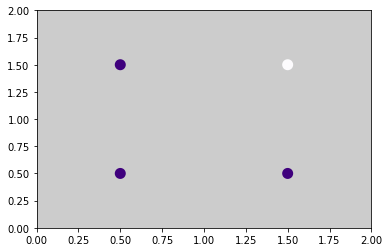

In [25]:
dum_X = np.array([[.5,.5],[1.5,.5],[.5,1.5],[1.5,1.5]])
dum_y = np.array([1,1,1,0])
plt.xlim([0,2])
plt.ylim([0,2])
plt.axes().set_facecolor('#cccccc')

plt.scatter(*zip(*dum_X),c = dum_y,cmap = 'Purples',linewidths = 5 )

1.0


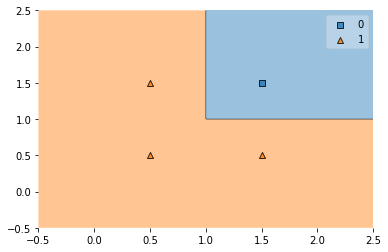

In [26]:
clf = DecisionTreeClassifier()
clf.fit(dum_X,dum_y)
plot_decision_regions(dum_X, dum_y, clf)
print(accuracy_score(dum_y,clf.predict(dum_X)))

0.8654970760233918


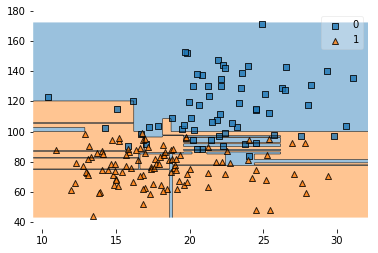

In [27]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
print(accuracy_score(y_test,clf.predict(X_test)))
plot_decision_regions(X_test.values,y_test, clf)

0.9122807017543859


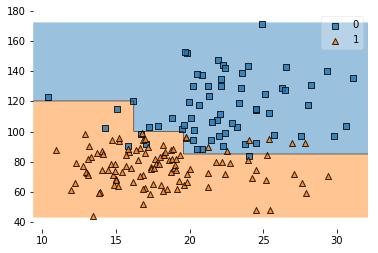

In [28]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train,y_train)
print(accuracy_score(y_test,clf.predict(X_test)))
plot_decision_regions(X_test.values,y_test, clf)

Use `GridSearchCV()` to find the best combination of `max_depth` and `min_samples_split` 

In [0]:
# conduct GridSearch.

### Support Vector Machine
[Documentation](https://scikit-learn.org/stable/modules/svm.html)

Very math-y. A simple explanation would be as follows.

This algorithm takes your, say, 2D data and puts it on a plane. Then, it stretches and curves that plane in a way that another plane is able to separate the data.

[Video Demonstrating the hyperplane simulation](https://www.youtube.com/watch?v=3liCbRZPrZA)

![](http://rvlasveld.github.io/images/oc-svm/visualization.gif)

[Image Source](http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/)

In [29]:
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.87      0.73      0.79        63
           1       0.86      0.94      0.89       108

   micro avg       0.86      0.86      0.86       171
   macro avg       0.86      0.83      0.84       171
weighted avg       0.86      0.86      0.86       171



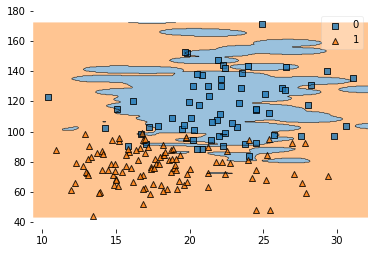

In [33]:
clf = SVC(kernel = 'rbf')
clf.fit(X_train,y_train)
print(classification_report(y_test, clf.predict(X_test)))
plot_decision_regions(X_test.values, y_test, clf)

## Classification Metric

The confusion matrix is the matrix that depicts the results of classification. We can take the following example.

[Source](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)
![](https://www.dataschool.io/content/images/2015/01/confusion_matrix_simple2.png)

In [34]:
# for our classifier
confusion_matrix(y_test, clf.predict(X_test))

array([[ 46,  17],
       [  7, 101]], dtype=int64)

### Accuracy, Recall, Precision, and F1 score

Accuracy is the easiest to understand. It is the ratio of correctly classified instances to the total number of instances that exist.

Accuracy $= \frac {TP + TN} {TP+TN + FP + FN}$

[Source](https://en.wikipedia.org/wiki/Precision_and_recall#Definition)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)

The metrics are selected as per the requirement of the classification. If the classifier must NOT misclassify true positives as false negatives, you would want a high recall—almost perfect.

There are several other metrics for classification. Depending on your use case, you would need to select the proper metric from the possible ones.

Additional Resource
[here](https://www.lexjansen.com/nesug/nesug10/hl/hl07.pdf).

## Ensemble

For all the previously mentioned methods, there are problems of your model either underfitting or overfitting your data. This is a common problem when the model doesn't properly sample your data or fails to account for the noise and structure in your data. 

[Read more](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229) on the Bias-Variance tradeoff and why it is important. 

Now, on to the solutions of our models' problems.

### Bootstrap
[Reference](https://hackernoon.com/how-to-develop-a-robust-algorithm-c38e08f32201)

This is basically the process of taking a lot of different samples with replacement from your main data set and using them to create miniature models. These models are later aggregated in two different ways referred to below as _Bagging_ and _Boosting_.

![](https://cdn-images-1.medium.com/max/1080/0*jW2hAGmYEFH0RP9W.)
More resources [here](https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/), [here](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/), and [here](https://blog.statsbot.co/ensemble-learning-d1dcd548e936).

### Bootstrap Aggregating (Bagging)
// Decreasing Variance

Here, the model is created so as to aggregate all the mini models and create a super model that helps decrease the variance that may exist in the model due to overfitting.
![](https://cdn-images-1.medium.com/max/720/0*zrm9Q8twgrq8lfLk.)

In [35]:
from sklearn.ensemble import BaggingClassifier

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.90      0.91      0.90       108

   micro avg       0.88      0.88      0.88       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



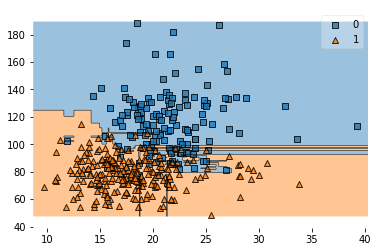

In [36]:
clf = BaggingClassifier() # gridsearch on this for a decision tree
clf.fit(X_train, y_train)
plot_decision_regions(X_train.values, y_train, clf)
print(classification_report(y_test, clf.predict(X_test)))

#### Random Forest
Implement the `RandomForestClassifier()` on this data. **In what ways does this method differ in comparison to `BaggingClassifier()`?**

In [0]:
# implement a RandomForestClassifier

### Boosting
// Decreasing Bias

For models that underfit their data, one must come up with ways in which the biases can be accounted for. With an underfit model, the biases need to be decreased. However, the use of Boosting may only be understood upon use. 

![](https://cdn-images-1.medium.com/max/720/0*xOFz7cCUP6aS7C1R.)

In [37]:
from sklearn.ensemble import AdaBoostClassifier

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        63
           1       0.92      0.94      0.93       108

   micro avg       0.91      0.91      0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



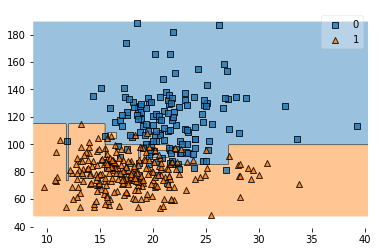

In [38]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))
plot_decision_regions(X_train.values,y_train,clf)

#### Gradient Boosting
Implement a GradientBoosting algorithm. **In what ways is this algorithm different from `AdaBoostClassifier()`?**

## Hyperparameter Search
Conduct Gridsearch on all of the different models used in this notebook. Before doing that, however, notice that we have only used two features from the data set. Repeat all the models that we've done using all the features in the `load_breast_cancer()` data set.
Thus,
```python
data = pd.DataFrame(load_breast_cancer().data, columns = load_breast_cancer().feature_names)
target = pd.Series(load_breast_cancer().target)
```
Split the data into train and test sets as required.

# Assignment
Create an email __spam / not-spam__ classifier using the `naive_bayes` class of classifiers.
This takes up more work than what is presented in this notebook. You will have to learn the concept of "vectorizing" your inputs using the `CountVectorizer()` and also learn novel techniques of visualizing your text data using the `wordcloud` module. There are several references that may be looked into for this task. 
Sequentially, the task involves the following steps:
- Import the required libraries
- Import the data and create training and testing sets
- Vectorize the data using `CountVectorizer()`. **Why do you need to vectorize your data?**
- Use visualization tools like `wordcloud` to better understand the data.
- Try out the different classifiers and ensemblers used here. Focus on the `MultinomialNB` classifier since it works well on text.

After attempting, you may look into [this](https://www.kaggle.com/futurist/text-preprocessing-and-machine-learning-modeling) for the solution. [Other](https://www.kaggle.com/uciml/sms-spam-collection-dataset/kernels) techniques also exist, but they may be out of scope for the currently uninitiated. Data sets for this classifier are publicly available [here](https://www.kaggle.com/futurist/text-preprocessing-and-machine-learning-modeling/data).